# Bengali Fake News Classification
```
    আমি বাংলায় গান গাই
    আমি বাংলার গান গাই।
    আমি আমার আমিকে চিরদিন
    এই বাংলায় খুঁজে পাই।
    
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
auth = pd.read_csv("/content/drive/MyDrive/research/fack news/Authentic-48K.csv")
fake = pd.read_csv("/content/drive/MyDrive/research/fack news/Fake-1K.csv")



In [ ]:
df1=auth
df2=fake
df_merged = df1.merge(df2)


In [ ]:
auth.head()

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1


In [ ]:
fake.head()

,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0


# EDA

In [ ]:
import matplotlib.pyplot as plt

def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column[:top].plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()


import seaborn as sns

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.distplot(column)
  plt.show()

### Compare Headline Length and Content Length

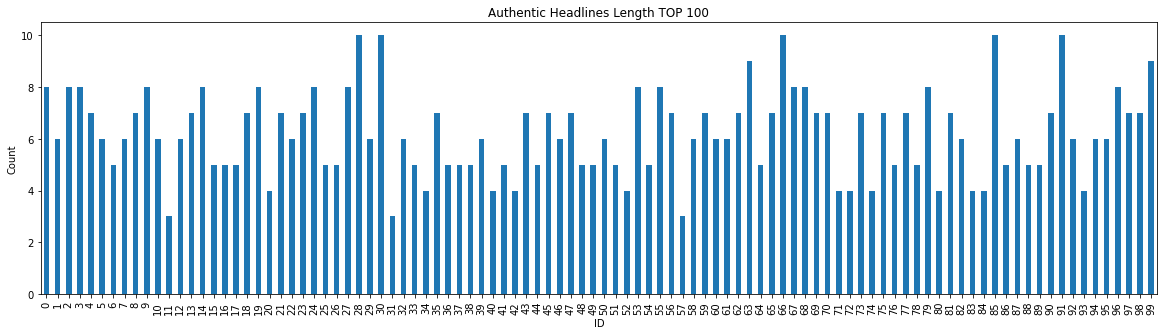

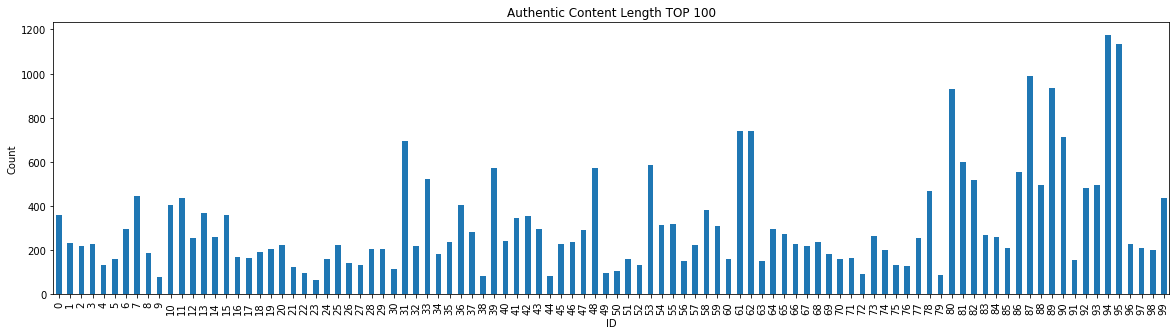

In [ ]:
auth['head_lenght'] = auth.headline.apply(lambda x : len(x.split()))
auth['content_head_lenght'] = auth.content.apply(lambda x : len(x.split()))


show_bar(auth.head_lenght, "Authentic Headlines Length TOP 100")
print("")
show_bar(auth.content_head_lenght, "Authentic Content Length TOP 100")

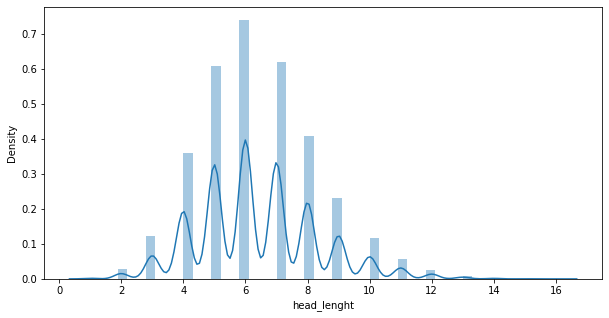

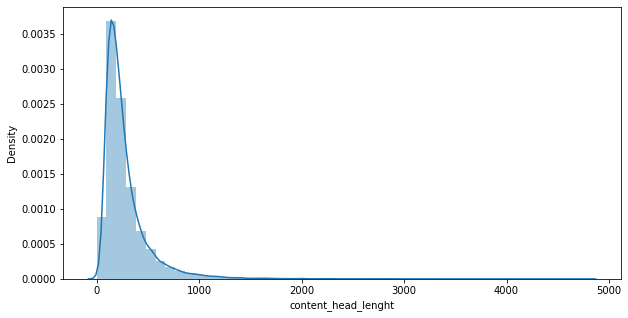

In [ ]:
show_dist(auth.head_lenght)
print("")
show_dist(auth.content_head_lenght)

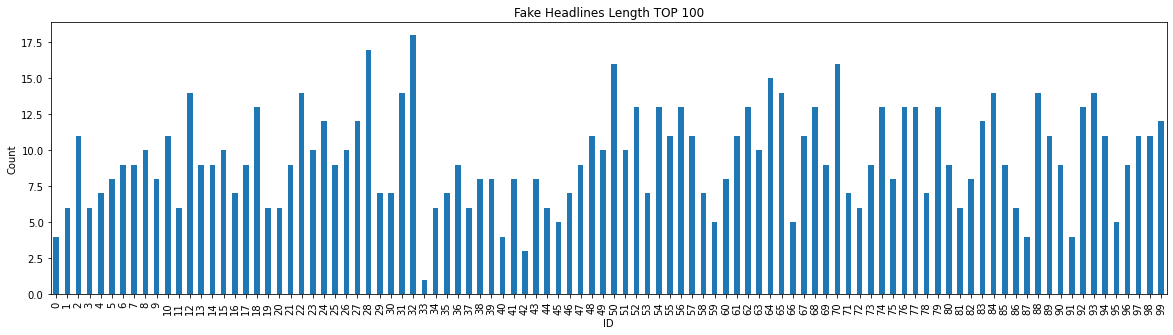

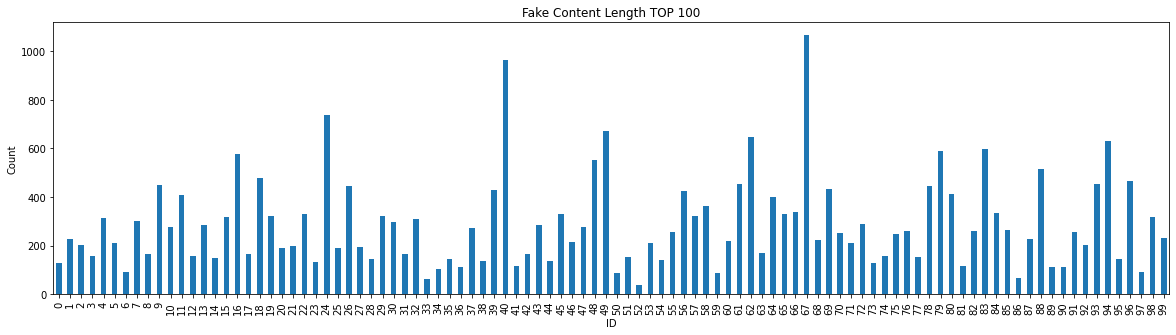

In [ ]:
fake['head_lenght'] = fake.headline.apply(lambda x : len(x.split()))
fake['content_head_lenght'] = fake.content.apply(lambda x : len(x.split()))

show_bar(fake.head_lenght, "Fake Headlines Length TOP 100")
print("")
show_bar(fake.content_head_lenght, "Fake Content Length TOP 100")

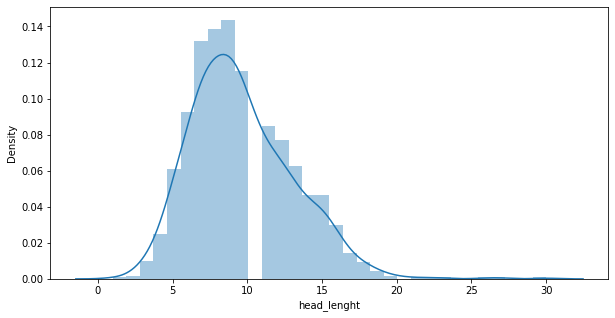

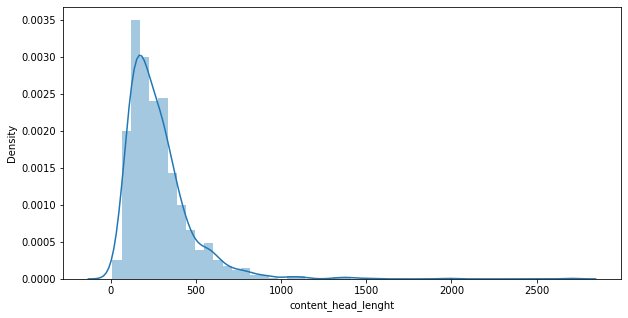

In [ ]:
show_dist(fake.head_lenght)
print("")
show_dist(fake.content_head_lenght)

## Word Cloud

In [ ]:
!wget https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip

--2022-12-30 13:30:46--  https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip
Resolving www.easynepalityping.com (www.easynepalityping.com)... 172.67.165.83, 104.21.11.66, 2606:4700:3035::ac43:a553, ...
Connecting to www.easynepalityping.com (www.easynepalityping.com)|172.67.165.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317905 (310K) [application/zip]
Saving to: ‘06-nikosh-bangla-font.zip’

06-nikosh-bangla-fo 100%[===================>] 310.45K  --.-KB/s    in 0.06s   

2022-12-30 13:30:46 (5.40 MB/s) - ‘06-nikosh-bangla-font.zip’ saved [317905/317905]



In [ ]:
!unzip 06-nikosh-bangla-font.zip

Archive:  06-nikosh-bangla-font.zip
  inflating: Nikosh.ttf              


In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_world(text):

    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='black', 
                    font_path="Nikosh.ttf",
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

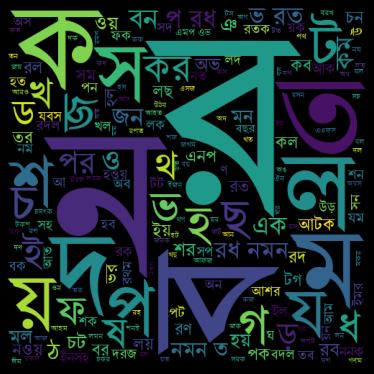

In [ ]:
s= " ".join(auth.headline[:100])
plot_world(s)

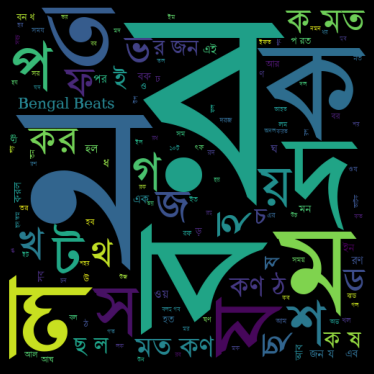

In [ ]:
s= " ".join(fake.headline[:100])
plot_world(s)

# Analysis Words

In [ ]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.2 MB/s 
     |████████████████████████████████| 23.9 MB 1.2 MB/s 
     |████████████████████████████████| 1.0 MB 45.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()

s = """আমি বাংলায় গান গাই
    আমি বাংলার গান গাই।
    আমি আমার আমিকে চিরদিন
    এই বাংলায় খুঁজে পাই।"""

print(tokenizer.tokenize(s))

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['আমি', 'বাংলায়', 'গান', 'গাই', 'আমি', 'বাংলার', 'গান', 'গাই', '।', 'আমি', 'আমার', 'আমিকে', 'চিরদিন', 'এই', 'বাংলায়', 'খুঁজে', 'পাই', '।']


In [ ]:
def create_corpus(texts):
    corpus=[]

    for txt in texts:
      tokens = tokenizer.tokenize(txt)
      corpus.extend(tokens)

    return corpus

In [ ]:
auth_corpus = create_corpus(auth.headline[:1000])
print("Total auth tokens in 1000", len(auth_corpus))

fake_corpus = create_corpus(fake.headline[:1000])
print("Total auth tokens in 1000", len(fake_corpus))

Total auth tokens in 1000 7482
Total auth tokens in 1000 10525


In [ ]:
from matplotlib import font_manager
# set font
font_manager.fontManager.addfont("Nikosh.ttf")
plt.rcParams['font.family'] = 'Nikosh'
plt.rcParams['font.sans-serif']=['Nikosh']
plt.rcParams['axes.unicode_minus']=False

In [ ]:
from collections import defaultdict
from collections import  Counter
from bnlp.corpus import stopwords
import matplotlib.font_manager as fm

def show_stop_words(corpus, length=20):
  dic = defaultdict(int)

  for word in corpus:
      if word in stopwords:
          dic[word]+=1

  top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:length]
  x,y=zip(*top)
  print(x)
  print(y)
  plt.figure(figsize=(10,5))
  plt.bar(x,y)
  plt.show()

('না', 'ও', 'শুরু', 'হবে', 'করে', 'নিয়ে', 'জন্য', 'থেকে', 'দুই', 'নতুন', 'সঙ্গে', 'কোটি', 'করা', 'করতে', 'হচ্ছে', 'দিতে', 'পর', 'প্রথম', 'কাজ', 'হাজার')
(57, 34, 23, 23, 23, 22, 21, 21, 19, 17, 17, 16, 16, 14, 14, 11, 11, 11, 11, 11)


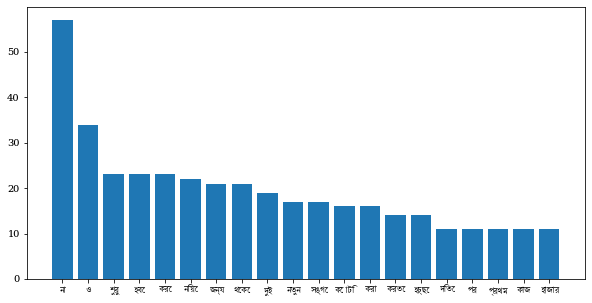

In [ ]:
show_stop_words(auth_corpus)

('না', 'যে', 'করে', 'ও', 'থেকে', 'নিয়ে', 'এই', 'জন্য', 'দিলেন', 'করলেন', 'এবার', 'করতে', 'কি', 'করা', 'বেশি', 'হবে', 'দুই', 'যা', 'পর', 'আমার')
(101, 58, 53, 40, 36, 36, 36, 28, 26, 25, 25, 25, 25, 22, 20, 20, 20, 18, 17, 17)


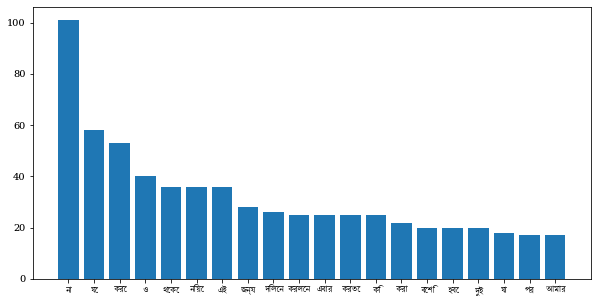

In [ ]:
show_stop_words(fake_corpus)

In [ ]:
from bnlp.corpus import stopwords, punctuations, digits

def filters(corpus):
  res = []
  for i in corpus:
    if i in stopwords:
      continue

    if i in punctuations + '‘' + '’':
      continue

    if i in digits:
      continue

    res.append(i)

  return res

In [ ]:
auth_corpus_filtered = filters(auth_corpus)
fake_corpus_filtered = filters(fake_corpus)

In [ ]:
def get_top_words(corpus):
  dic = defaultdict(int)

  for word in corpus:
      dic[word] +=1

  top = sorted(dic.items(), key=lambda x:x[1],reverse=True)
  x,y=zip(*top)
  return x, y

In [ ]:
x, y = get_top_words(auth_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('১৯', 'সেপ্টেম্বর', '২০১৮', 'প্রধানমন্ত্রী', 'পাকিস্তান', 'লাখ', 'ভারত', 'আটক', 'বাংলাদেশ', 'উদ্ধার')
(56, 52, 51, 45, 33, 25, 23, 21, 20, 20)


In [ ]:
x, y = get_top_words(fake_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('দৈনিক', 'মতিকণ্ঠ', 'Bengal', 'Beats', 'এক', 'হয়ে', 'সাথে', 'দিয়ে', 'কারণে', 'শেখ')
(151, 151, 139, 139, 41, 29, 24, 21, 20, 19)


# Classify News

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 6.2 MB/s 
     |████████████████████████████████| 182 kB 72.3 MB/s 
     |████████████████████████████████| 7.6 MB 53.1 MB/s 


In [ ]:
import time

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import BertModel, BertTokenizer, BertForSequenceClassification

# Prepare Datasets
- Dataset Info: Datasets contain `48678` authentic news and `1299` fake news. For this experiment, instead of all authentic news, only 5 times of fake news was used.
- And only consider the first 100 words (including headline and content)

- On datasets: Both headline and content of news were used. And manually a separator was added also `[SEP]`.

> BERT model is designed in such a way that the sentence has to start with the [CLS] token and end with the [SEP] token.
If we want to make separation of two sentences we can use [SEP] between sentences

### Train and Test split: 
(only 20% data used for testing)
- Total Dataset size: 10392
- Total train size: 8313
- Test train size: 2079

In [ ]:
class NewsDatasets(Dataset):
    def __init__(self, data, max_length=100):
        self.data = data
        
        self.config = {
            "max_length": max_length,
            "padding": "max_length",
            "return_tensors": "pt",
            "truncation": True,
            "add_special_tokens": True
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        value = self.data.iloc[idx]
        return value['head']+"[SEP]"+value['con'] , value['label']

In [ ]:
auth = pd.read_csv("/content/drive/MyDrive/research/fack news/Authentic-48K.csv")
fake = pd.read_csv("/content/drive/MyDrive/research/fack news/Fake-1K.csv")

df = auth[:fake.shape[0]* 7]
df = df.append(fake)
df = df.sample(frac=1).reset_index(drop=True)
len(df)


10392

In [ ]:
df.head()

,articleID,domain,date,category,headline,content,label
0,9276,jagonews24.com,2018-09-22 20:12:27,National,চিকিৎসার পর নতুন ঘর পেলেন অসহায় মা-মেয়ে,‘ম্যালাদিন অসুখোত পরি আছিনো হামরা মাও-বেটি। কা...,1
1,5728,samakal.com,2018-09-21 15:01:30,National,প্রেমের জন্য...,নারায়ণগঞ্জের আড়াইহাজারে প্রেমিকের সঙ্গে অভিমান...,1
2,3087,dailynayadiganta.com,2018-09-20 14:50:25,Politics,২১ আগস্ট মামলার রায় নিয়ে বিএনপির শঙ্কা,২১ আগস্ট গ্রেনেড হামলা মামলায় ন্যায়বিচার হওয়া ...,1
3,6092,kalerkantho.com,2018-09-21 16:38:04,International,কাশ্মীরে ৩ পুলিশকে অপহরণের পর হত্যা,ভারত নিয়ন্ত্রিত কাশ্মীরে আবারো তিন পুলিশকে অপহ...,1
4,9617,kalerkantho.com,2018-09-22 22:03:36,International,পাকিস্তান এখনো সন্ত্রাসের স্বর্গ: যুক্তরাষ্ট্র,পাকিস্তানকে আবারো সন্ত্রাসবাদের দায়ে অভিযুক্ত ...,1


In [ ]:
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


btokenizer = BasicTokenizer()

def clean_text(text):
    tokens = btokenizer.tokenize(text)
    filtered = []
    for i in tokens:
        i= ps.stem(i)
        if i in stopwords:
            continue
    
        if i in punctuations + '‘' + '’':
            continue
    
        filtered.append(i)
    
    return " ".join(filtered)

print("********** Before ***************")
text = df.iloc[1]['content']
print(text)
print("\n********** After ***************")
print(clean_text(text))

********** Before ***************
নারায়ণগঞ্জের আড়াইহাজারে প্রেমিকের সঙ্গে অভিমান করে মায়া আক্তার (১৬) নামে এক স্কুলছাত্রী আত্মহত্যা করেছে। শুক্রবার সকাল ১০ টার দিকে ঢাকা মেডিকেল কলেজ হাসপাতালে নেয়ার পথে তার মৃত্যু হয়। নিহত মায়া উপজেলার ব্রাহ্মন্দী ইউনিয়নের ডহর মারুয়াদী গ্রামের মিজানুর রহমানের মেয়ে ও কলাগাছিয়া উচ্চ বিদ্যালয়ের দশম শ্রেণির ছাত্রী। নিহতের পরিবারের বরাতে পুলিশ জানায়, মায়া আক্তারের সঙ্গে পার্শবর্তী লেঙ্গুরদী গ্রামের আম্বর আলীর ছেলের মিরাজের প্রেমের সম্পর্ক ছিল। কয়েক সপ্তাহ আগে মিরাজের মালেয়শিয়া যাওয়ার প্রস্তুতির খবর পেয়ে মায়া তাকে বিয়ের জন্য চাপ দেয়। এমনকি মায়ার পরিবার মিরাজের বাড়িতে বিয়ের প্রস্তাবও নিয়ে যায়। কিন্তু মিরাজের পরিবার  প্রস্তাবটি প্রত্যাখান করে। বৃহস্পতিবার রাতে এ নিয়ে মিরাজের সঙ্গে ফোনে বাকবিতণ্ডা হয় মায়ার। পরে শুক্রবার সকালে ঘরে রাখা ইঁদুর মারার কীটনাশক পান করে মায়া। পরিবারের লোকজন বিষয়টি টের পেয়ে তাকে উদ্ধার করে প্রথমে উপজেলা স্বাস্থ্য কমপ্লেক্সে নিয়ে যায়। সেখানে  অবস্থার অবনতি হলে কর্তব্যরত চিকিৎসক তাকে ঢাকা মেকিকেল কলেজ হাসপাতালে স্থানান্তর করেন। কিন্তু ঢাক

In [ ]:
df['head'] = df.headline.apply(clean_text)
df['con'] = df.content.apply(clean_text)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=121, stratify=df['label'])

In [ ]:
len(train_df), len(test_df)

(8313, 2079)

In [ ]:
training_data = NewsDatasets(train_df)
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)

In [ ]:
test_data = NewsDatasets(test_df)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=True)

# Define Model
 `Bert` stands for Bidirectional Encoder Representations from Transformers used in this experiment with two additional `Fully Connected` Layers. 
 
 For this experiment, [Bangla Bert](https://huggingface.co/sagorsarker/bangla-bert-base) pretrained model was used.

#### FC layers
- First Linear Layer: IO(768 -> 128)
- Second Linear Layer: IO(128 -> 2)

#### Additionals
- Activation Fuction: Relu
- Dropout: 20%
- Optimizer: AdamW
- Loss: CrossEntropyLoss
- Scheduler: StepLR

In [ ]:
class NewsBert(nn.Module):

    def __init__(self, bert):
        super(NewsBert, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.2)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 128)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(128, 2)  

    # define the forward pass
    def forward(self, input_ids, token_type_ids, attention_mask):
        # pass the inputs to the model
        out = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        x = self.fc1(out[1])
        x = self.relu(x)
        # output layer
        x = self.fc2(self.dropout(x))
        
        return x

In [ ]:
bert_model_name = "sagorsarker/bangla-bert-base"
bert = BertModel.from_pretrained(bert_model_name)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

Downloading:   0%|          | 0.00/491 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/660M [00:00<?, ?B/s]

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

In [ ]:
# for param in bert.parameters():
#     param.requires_grad = False

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NewsBert(bert)
model.to(device);

In [ ]:
s = "আমি বাংলায় গান গাই। [SEP]"
t = tokenizer.encode_plus(s, return_tensors="pt").to(device)
print(t)
out = model(**t)
print(out)

{'input_ids': tensor([[  101,  2169,  2492,  9294,  2552, 13985,  1014,   102,   102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
tensor([[0.1831, 0.3195]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [ ]:
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=2, gamma=0.1)

# Lets Train

In [ ]:
def train(model, dataloader, optimizer, criterion, config):
    model.train()  # prep model for training
    train_loss = 0
    for batch in tqdm(dataloader):
        text, labels = batch

        model.zero_grad()

        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        logs = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss = criterion(logs, labels)
        train_loss += loss.item() * input_ids.size(0)
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    return train_loss

In [ ]:
def evaluate(model, dataloader, criterion, config):
    total = 0
    correct = 0
    valid_loss = 0.0

    model.eval()  # prep model for evaluation
    for batch in dataloader:
        text, labels = batch
        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss_p = criterion(output, labels)
        # update running validation loss
        valid_loss += loss_p.item() * input_ids.size(0)
        # calculate accuracy
        proba = torch.exp(output)
        top_p, top_class = proba.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        # accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return total, correct, valid_loss

In [ ]:
epochs = 10
tokenizer_config = {
    "max_length": 100,
    "padding": "max_length",
    "return_tensors": "pt",
    "truncation": True,
    "add_special_tokens": True
}

In [ ]:
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf

for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    correct = 0
    e_since = time.time()

    # Train Model
    train_loss += train(model, train_dataloader, optimizer, criterion, tokenizer_config)
    # Now Evaluate
    out = evaluate(model, test_dataloader, criterion, tokenizer_config)
    total += out[0]
    correct += out[1]
    valid_loss += out[2]
    
    scheduler.step()

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_dataloader.dataset)
    valid_loss = valid_loss / len(test_dataloader.dataset)

    # calculate train loss and running loss
    train_loss_data.append(train_loss * 100)
    valid_loss_data.append(valid_loss * 100)
    
    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "news_model1.pth")

    print("\tTrain loss:{:.6f}..".format(train_loss),
          "\tValid Loss:{:.6f}..".format(valid_loss),
          "\tAccuracy: {:.4f}".format(correct / total * 100))

time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.241092.. 	Valid Loss:0.189136.. 	Accuracy: 94.0356
Epoch: 2/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.136252.. 	Valid Loss:0.164642.. 	Accuracy: 94.4685
Epoch: 3/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.065753.. 	Valid Loss:0.198746.. 	Accuracy: 95.4305
Epoch: 4/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.055782.. 	Valid Loss:0.197439.. 	Accuracy: 95.2862
Epoch: 5/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.050292.. 	Valid Loss:0.208551.. 	Accuracy: 95.5267
Epoch: 6/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.050641.. 	Valid Loss:0.207982.. 	Accuracy: 95.4786
Epoch: 7/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.051029.. 	Valid Loss:0.208107.. 	Accuracy: 95.4786
Epoch: 8/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.048824.. 	Valid Loss:0.209248.. 	Accuracy: 95.4786
Epoch: 9/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.048603.. 	Valid Loss:0.209219.. 	Accuracy: 95.4786
Epoch: 10/10


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.048169.. 	Valid Loss:0.209232.. 	Accuracy: 95.4786
Training completed in 39m 29s


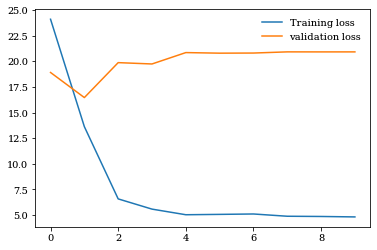

In [ ]:
from matplotlib import pyplot as plt

plt.plot(train_loss_data, label="Training loss")
plt.plot(valid_loss_data, label="validation loss")
plt.legend(frameon=False)

# Testing
To test this model, the left 15% data was used.

In [ ]:
model.load_state_dict(torch.load("./news_model1.pth", map_location = device))

<All keys matched successfully>

In [ ]:
all_preds = []
all_labels = []

for batch in test_dataloader:
    text, labels = batch
    inputs = tokenizer.batch_encode_plus(
        text, **tokenizer_config
    )
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = labels.to(device)

    # move things to model
    output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)
    preds = output.detach().cpu().numpy()
    preds = np.argmax(preds, axis = 1)
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

In [ ]:
from sklearn.metrics import classification_report

# preds = np.argmax(preds, axis = 1)
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       260
           1       0.96      0.97      0.97      1819

    accuracy                           0.94      2079
   macro avg       0.88      0.86      0.87      2079
weighted avg       0.94      0.94      0.94      2079



#### Thank you very much for reading.
### পড়ার জন্য আপনাকে অনেক ধন্যবাদ।